In [6]:
df.dropna()

,PV INPUT \nsiris C (kWh/kW),irradiance \n(W/m2),PM2.5,Cloud cover (%),Temperature
0,0.000000,0.000000,10.513330,0.0,23.888889
1,0.000000,0.000000,9.220000,0.0,22.777778
2,0.000000,0.000000,8.220000,0.0,22.777778
3,0.000000,0.000000,8.586667,0.0,22.222222
4,0.000000,0.000000,8.643333,0.0,22.222222
...,...,...,...,...,...
235,0.166404,267.547252,17.193100,0.0,28.888889
236,0.024769,2.978207,16.073330,0.0,26.111111
237,0.000000,0.000000,15.740000,0.0,25.000000
238,0.000000,0.000000,15.223330,0.0,23.888889


In [18]:
df = pd.read_csv('siris-C-22-08-2023.csv').drop(columns=['Datetime','AOD']).isna()
df[df['PM2.5']==True]

,PV INPUT \nsiris C (kWh/kW),irradiance \n(W/m2),PM2.5,Cloud cover (%),Temperature
14,False,False,True,False,False


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('siris-C-22-08-2023.csv').drop(columns=['AOD'])

# Drop the 'Datetime' column as it is not needed for the regression
df = df.drop(columns=['Datetime'])

# Separate the target variable (PV INPUT) and features
target_variable = 'PV INPUT \nsiris C (kWh/kW)'
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.005123655621711589
R-squared: 0.9445296226322453


In [20]:
# Displaying the trained model weights
weights = pd.DataFrame({"Feature": X.columns, "Weight": model.coef_})
print("Intercept:", model.intercept_)
print(weights)

Intercept: 0.23296605208333332
               Feature    Weight
0  irradiance \n(W/m2)  0.260779
1                PM2.5  0.001966
2      Cloud cover (%) -0.010872
3          Temperature  0.033673


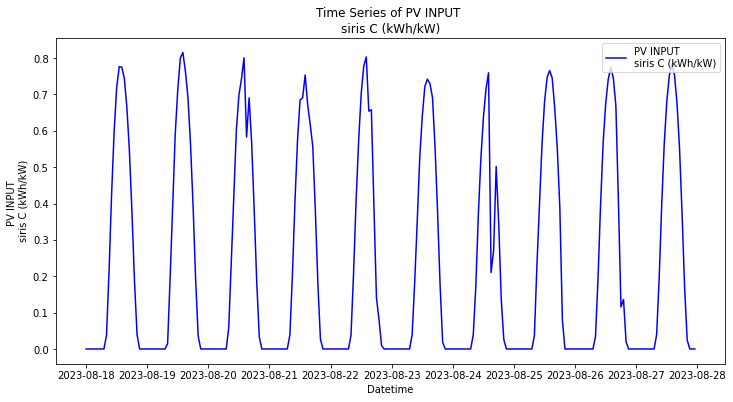

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# Extracting the datetime column and the target variable
df = pd.read_csv('siris-C-22-08-2023.csv')
datetime_series = pd.to_datetime(df["Datetime"])
pv_input_series = df["PV INPUT \nsiris C (kWh/kW)"]

# Plotting the time series of PV INPUT
plt.figure(figsize=(12, 6))
plt.plot(datetime_series, pv_input_series, label="PV INPUT \nsiris C (kWh/kW)", color="blue")
plt.xlabel("Datetime")
plt.ylabel("PV INPUT \nsiris C (kWh/kW)")
plt.title("Time Series of PV INPUT \nsiris C (kWh/kW)")
plt.legend()
plt.show()

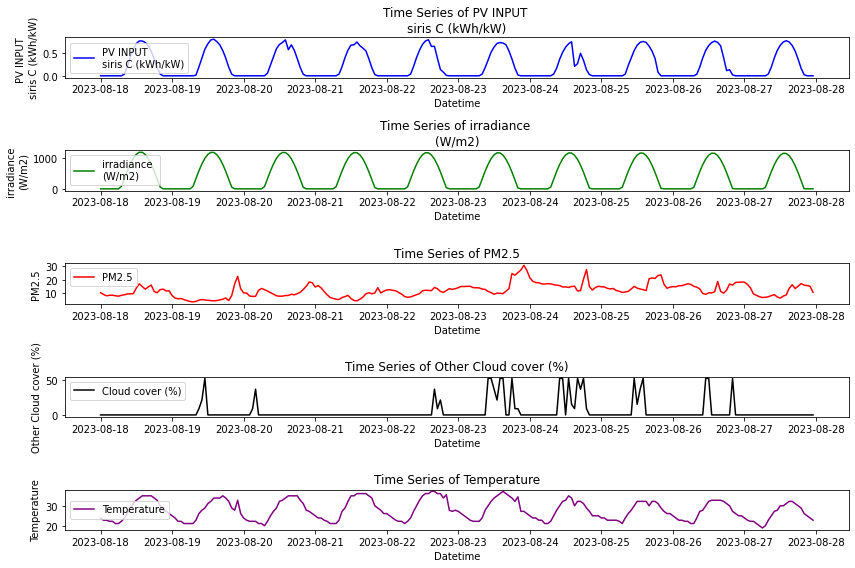

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# Extracting the datetime column and the target variables
datetime_series = pd.to_datetime(df["Datetime"])
pv_input_series = df["PV INPUT \nsiris C (kWh/kW)"]
other_variable1_series = df["irradiance \n(W/m2)"]
other_variable2_series = df["PM2.5"]
other_variable3_series = df['Cloud cover (%)']
other_variable4_series = df['Temperature']

# Plotting the time series of PV INPUT
plt.figure(figsize=(12, 8))

# Plotting PV INPUT
plt.subplot(5, 1, 1)
plt.plot(datetime_series, pv_input_series, label="PV INPUT \nsiris C (kWh/kW)", color="blue")
plt.xlabel("Datetime")
plt.ylabel("PV INPUT \nsiris C (kWh/kW)")
plt.title("Time Series of PV INPUT \nsiris C (kWh/kW)")
plt.legend()

# Plotting Other Variable 1
plt.subplot(5, 1, 2)
plt.plot(datetime_series, other_variable1_series, label="irradiance \n(W/m2)", color="green")
plt.xlabel("Datetime")
plt.ylabel("irradiance \n(W/m2)")
plt.title("Time Series of irradiance \n(W/m2)")
plt.legend()

# Plotting Other Variable 2
plt.subplot(5, 1, 3)
plt.plot(datetime_series, other_variable2_series, label="PM2.5", color="red")
plt.xlabel("Datetime")
plt.ylabel("PM2.5")
plt.title("Time Series of PM2.5")
plt.legend()

# Plotting Other Variable 3
plt.subplot(5, 1, 4)
plt.plot(datetime_series, other_variable3_series, label="Cloud cover (%)", color="black")
plt.xlabel("Datetime")
plt.ylabel("Other Cloud cover (%)")
plt.title("Time Series of Other Cloud cover (%)")
plt.legend()

# Plotting Other Variable 4
plt.subplot(5, 1, 5)
plt.plot(datetime_series, other_variable4_series, label="Temperature", color="purple")
plt.xlabel("Datetime")
plt.ylabel("Temperature")
plt.title("Time Series of Temperature")
plt.legend()

plt.tight_layout()
plt.show()


## Site B: Koropi

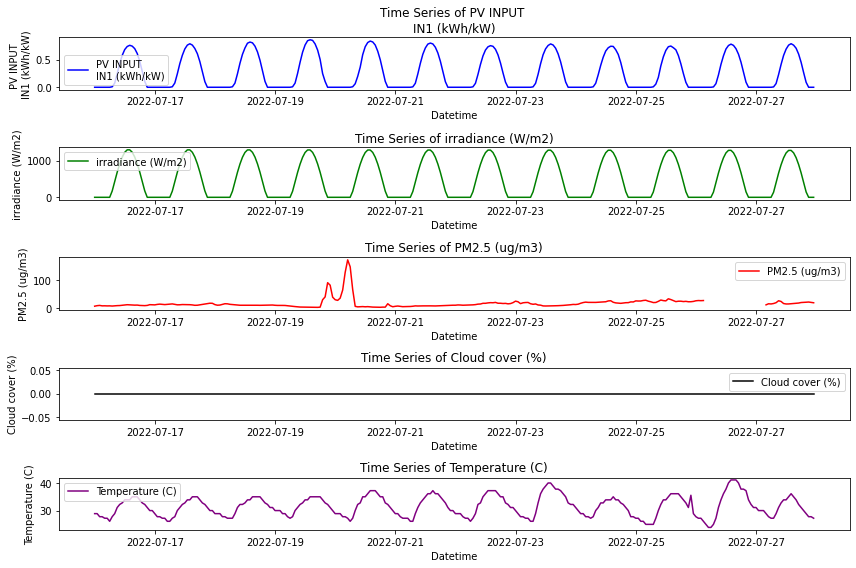

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('IN1-20-07-2022.csv').drop(columns=['AOD'])

pv = '''PV INPUT 
IN1 (kWh/kW)'''
irr = 'irradiance (W/m2)'
pm25 = 'PM2.5 (ug/m3)'
cloud = 'Cloud cover (%)'
temp = 'Temperature (C)'

# Assuming your data is in a DataFrame called 'df'
# Extracting the datetime column and the target variables
datetime_series = pd.to_datetime(df["Datetime"])
pv_input_series = df[pv]
other_variable1_series = df[irr]
other_variable2_series = df[pm25]
other_variable3_series = df[cloud]
other_variable4_series = df[temp]

# Plotting the time series of PV INPUT
plt.figure(figsize=(12, 8))

# Plotting PV INPUT
plt.subplot(5, 1, 1)
plt.plot(datetime_series, pv_input_series, label=pv, color="blue")
plt.xlabel("Datetime")
plt.ylabel(pv)
plt.title(f"Time Series of {pv}")
plt.legend()

# Plotting Other Variable 1
plt.subplot(5, 1, 2)
plt.plot(datetime_series, other_variable1_series, label=irr, color="green")
plt.xlabel("Datetime")
plt.ylabel(irr)
plt.title(f"Time Series of {irr}")
plt.legend()

# Plotting Other Variable 2
plt.subplot(5, 1, 3)
plt.plot(datetime_series, other_variable2_series, label=pm25, color="red")
plt.xlabel("Datetime")
plt.ylabel(pm25)
plt.title(f"Time Series of {pm25}")
plt.legend()

# Plotting Other Variable 3
plt.subplot(5, 1, 4)
plt.plot(datetime_series, other_variable3_series, label=cloud, color="black")
plt.xlabel("Datetime")
plt.ylabel(cloud)
plt.title(f"Time Series of {cloud}")
plt.legend()

# Plotting Other Variable 4
plt.subplot(5, 1, 5)
plt.plot(datetime_series, other_variable4_series, label=temp, color="purple")
plt.xlabel("Datetime")
plt.ylabel(temp)
plt.title(f"Time Series of {temp}")
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('IN1-20-07-2022.csv').drop(columns=['AOD']).dropna(axis=0)

# Drop the 'Datetime' column as it is not needed for the regression
df = df.drop(columns=['Datetime'])

# Separate the target variable (PV INPUT) and features
target_variable = pv
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.003265746006402493
R-squared: 0.9569768562289387


In [33]:
# Displaying the trained model weights
weights = pd.DataFrame({"Feature": X.columns, "Weight": model.coef_})
print("Intercept:", model.intercept_)
print(weights)

Intercept: 0.2779670947867299
             Feature    Weight
0  irradiance (W/m2)  0.271322
1      PM2.5 (ug/m3)  0.000302
2    Cloud cover (%)  0.000000
3    Temperature (C)  0.046831
